In [1]:
%display latex
var('t k b ') 
x = function('x')(t) 
DE2 = diff(x,t,t) == -2*x - 1/2*diff(x,t) 
u2 = desolve(DE2, x, ivar=t)

In [2]:
var('R,R_w,I,U,U_t') 
U_t = U==I*(R+R_w)
show(U_t)

U == I*(R + R_w)

In [3]:
eq=solve(U_t,I);eq

[I == U/(R + R_w)]

In [4]:
P=R*I^2;P

I^2*R

In [5]:
P1=P.substitute(eq[0]);P1

R*U^2/(R + R_w)^2

In [6]:
P1.diff(R)==0 

U^2/(R + R_w)^2 - 2*R*U^2/(R + R_w)^3 == 0

In [7]:
solve(_, R) 

[R == R_w]

In [8]:
P1.diff(R, 2) 

-4*U^2/(R + R_w)^3 + 6*R*U^2/(R + R_w)^4

In [9]:
_.substitute(R==R_w)

-1/8*U^2/R_w^3

In [10]:
solve(_<0, R_w) 

[[0 < R_w, U != 0]]

/home/pc/sage/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


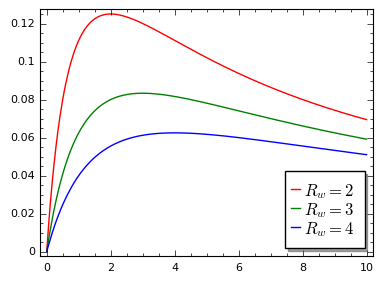

In [11]:
P2 = plot(P1.subs({U:1, R_w:2}),(R,0,10), color="red",legend_label=r'$R_w=2$')
P3 = plot(P1.subs({U:1, R_w:3}),(R,0,10), color="green", legend_label=r'$R_w=3$')
P4 = plot(P1.subs({U:1, R_w:4}),(R,0,10), color="blue", legend_label=r'$R_w=4$')
show(P2+P3+P4,figsize=4,frame=True,fontsize=8,axes=False)

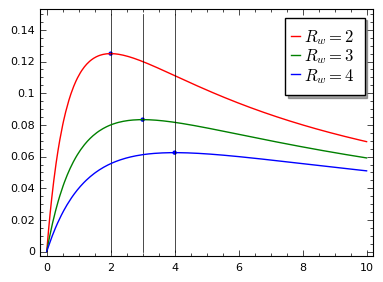

In [12]:
P2l = P2 +line([(2,0),(2,0.15)], color="black", thickness=0.5) +point((2, P1.subs({U:1, R_w:2, R:2}))) 
P3l = P3 +line([(3,0),(3,0.15)], color="black", thickness=0.5) +point((3, P1.subs({U:1, R_w:3, R:3}))) 
P4l = P4 +line([(4,0),(4,0.15)], color="black", thickness=0.5) +point((4, P1.subs({U:1, R_w:4, R:4}))) 
show(P2l+P3l+P4l,figsize=4,frame=True,fontsize=8,axes=False)

In [13]:
var('C, R_o,R, t, U_0, U_in, omega') 
U = function('U')(t) 
R_0= U.diff()+U/(R*C)==0;show(R_0)

U(t)/(C*R) + diff(U(t), t) == 0

In [14]:
sol = desolve(R_0, U, ivar=t, ics=[0, U_0]);sol

U_0*e^(-t/(C*R))

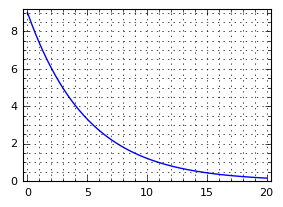

In [15]:
show(plot(sol.substitute({U_0:9, R:1, C:5}), 0, 20),
     figsize=3,frame=True,axes=False,gridlines="minor",
    fontsize=8) 

In [16]:
R_0= U.diff() + U/(R*C) == sin(omega*t)
sol = desolve(R_0, U, ivar=t, ics=[0,U_0]);show(R_0)

U(t)/(C*R) + diff(U(t), t) == sin(omega*t)

$i_R=\frac{U_R}{R}$    (1)

$V_L=L\frac{di_L}{dt}$ (2)

$i_C=C\frac{dV_C}{dt}$ (3)

<img src="RC.png">

$i_R$ + $i_C$ = 0

$\frac{V_C-V_in}{R}$ + $C\frac{dV_C}{dt} = 0 $ 

$\frac{v-V_in}{R}$ + $C\frac{dv}{dt} = 0 $ 

In [17]:
var('R, C, L, V_in');t = var('t') ;v = function('v')(t)

In [18]:
eq1 = (v-V_in)/R + C* diff(v,t) == 0 
print 'équation circuit RC:' 
show(eq1) 

équation circuit RC:


C*diff(v(t), t) - (V_in - v(t))/R == 0